In [ ]:
require(Seurat)
require(Matrix)
require(ggplot2)
require(ggrepel)
require(enrichR)

In [ ]:
data = Read10X(data.dir = "/data/yosef2/users/mattjones/projects/metastasis/JQ19/5k/RNA/ALL_Samples/GRCh38")
data = CreateSeuratObject(counts = data, project = "5k", min.cells = 0.01*ncol(data), min.features = 200)

meta = read.table("/data/yosef2/users/mattjones/projects/metastasis/JQ19/5k/RNA/LG_meta.txt", sep='\t', row.names=1, header=T)


In [ ]:
n.factor = median(colSums(data))
data <- NormalizeData(data, normalization.method = "LogNormalize", scale.factor = n.factor)


In [ ]:
to.drop = which(is.na(meta$DynamicMetScore))
data.f = data[,-to.drop]


In [ ]:
# data.f$lineage.group = meta[colnames(data.f), 'LineageGroup']
# data.f$dynamicScore = meta[colnames(data.f), 'DynamicMetScore']

bot.perc = 0.004
top.perc = 0.21

data.met = subset(data.f, ((dynamicScore >= top.perc) | (dynamicScore <= bot.perc)))

data.met$dynamicGroup = unlist(lapply(data.met$dynamicScore, function(x) return(ifelse(x >= top.perc, 'High', 'Low'))))

In [33]:
Idents(data.met) = 'dynamicGroup'

In [ ]:
de = FindAllMarkers(data.met, test.use='MAST', logfc.threshold=0)

 [1] "PRKCDBP" "DPYSL3"  "LGALS1"  "MT-CO1"  "MT-CO2"  "S100A4"  "MT-CO3" 
 [8] "CLU"     "B2M"     "AGR2"    "REG4"    "IFI27"   "FN1"     "RPS4Y1" 
[15] "ATP6V1A" "KRT17"   "FXYD2"   "FOSB"    "ANXA4"   "CFD"     "PHPT1"  
[22] "JUNB"    "IFI6"   


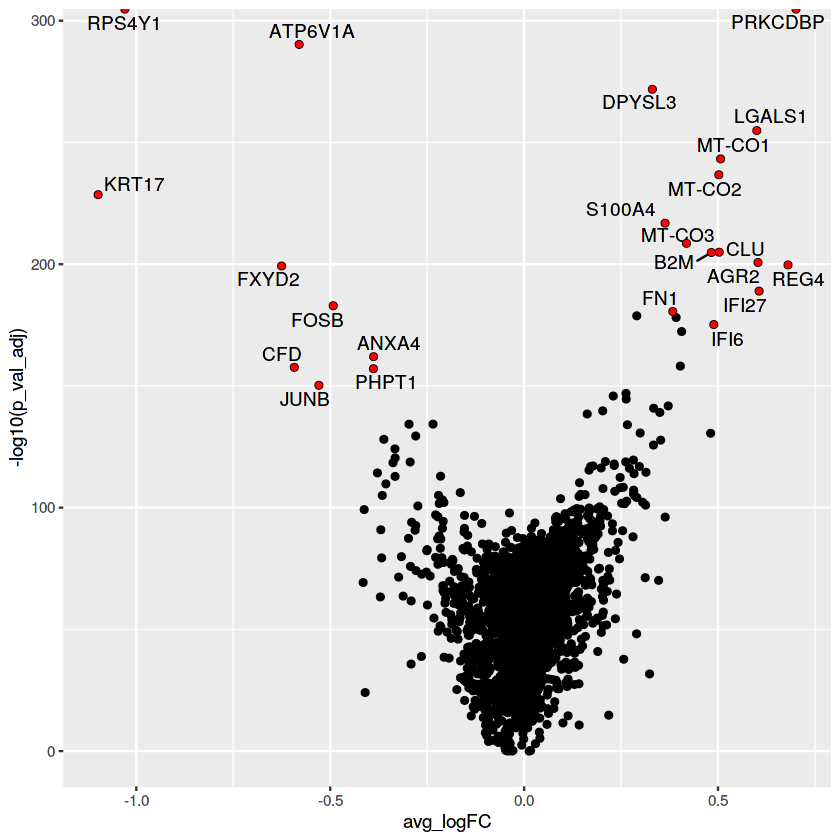

In [68]:
de_high = de[de$cluster == 'High',]
de_low = de[de$cluster == 'Low',]

de_high$log10_qval = -log10(de_high$p_val_adj)
genes = de_high
pos = genes[genes$avg_logFC > 0.30 & genes$log10_qval > -log10(0.05),]
neg = genes[genes$avg_logFC < -0.30 & genes$log10_qval > -log10(0.05),]

pos.quantile = quantile(pos$log10_qval[is.finite(pos$log10_qval)], c(0.6))[[1]]
neg.quantile = quantile(neg$log10_qval[is.finite(neg$log10_qval)], c(0.7))[[1]]

pos.genes = as.character(pos[pos$log10_qval >= pos.quantile,"gene"])
neg.genes = as.character(neg[neg$log10_qval >= neg.quantile,"gene"])

keep.genes = c(pos.genes, neg.genes, 'IFI6')
print(keep.genes)

ggplot(genes, aes(avg_logFC, -log10(p_val_adj), label=gene)) + 
geom_point() + 
geom_text_repel(data = subset(genes, gene %in% keep.genes)) + 
geom_point(color = ifelse(genes$gene %in% keep.genes, "red", "black"), size = ifelse(genes$gene %in% keep.genes, 1, 1/100))


In [87]:
pos = genes[genes$avg_logFC > 0.30 & genes$log10_qval > -log10(0.05),]$gene
neg = genes[genes$avg_logFC < -0.30 & genes$log10_qval > -log10(0.05),]$gene

db= enrichr(pos, databases=c('MSigDB_Oncogenic_Signatures'))$MSigDB_Oncogenic_Signatures
db[order(db$Adjusted.P.value),]

Uploading data to Enrichr... Done.
  Querying MSigDB_Oncogenic_Signatures... Done.
Parsing results... Done.


,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
3,LEF1 UP.V1 UP,4/195,1.968842e-04,0.01240371,0,0,13.675214,116.689159,LGALS1;PRKCDBP;FN1;S100A4
1,BMI1 DN MEL18 DN.V1 DN,4/147,6.616028e-05,0.01250429,0,0,18.140590,174.574699,IFI27;IFI6;S100A4;NEAT1
2,LEF1 UP.V1 DN,4/190,1.782334e-04,0.01684306,0,0,14.035088,121.156723,DPYSL3;AGR2;TFF1;CXCL5
6,ALK DN.V1 DN,3/148,1.392368e-03,0.04385960,0,0,13.513514,88.874988,IFI27;CEACAM6;IFI6
5,BMI1 DN.V1 DN,3/144,1.286950e-03,0.04864670,0,0,13.888889,92.437228,IFI27;IFI6;S100A4
4,RB P130 DN.V1 DN,3/139,1.162465e-03,0.05492649,0,0,14.388489,97.226075,NEAT1;CLU;B2M
10,MEK UP.V1 UP,3/196,3.096721e-03,0.05852802,0,0,10.204082,58.953179,ALDH3A1;AKR1B10;CEACAM6
9,LTE2 UP.V1 DN,3/196,3.096721e-03,0.06503113,0,0,10.204082,58.953179,LGALS1;IFI27;IFI6
8,P53 DN.V1 UP,3/194,3.008464e-03,0.07107495,0,0,10.309278,59.859028,IFI27;CEACAM6;AGR2
